In [63]:
import pandas as pd #used for data manipulation

import numpy as np #used for numerical analysis

from collections import Counter as c # return counts of number of classess

import matplotlib.pyplot as plt #used for data Visualization

import seaborn as sns #data visualization Library

import missingno as msno #finding missing values

from sklearn.metrics import accuracy_score, confusion_matrix#model performance

from sklearn.model_selection import train_test_split #splits data in random train and test array

from sklearn.preprocessing import LabelEncoder #encoding the levels of categorical features

from sklearn.linear_model import LogisticRegression #Classification ML algorithm

import pickle #Python object hierarchy is converted into a byte stream

In [64]:
data=pd.read_csv("/content/kidney_disease (2).csv")
data.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd


In [65]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [66]:
data.columns=['id','age','blood pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random', 'blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema', 'anemia','class']

In [67]:
data.columns

Index(['id', 'age', 'blood pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [70]:
data.isnull().any()

id                         False
age                         True
blood pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [71]:
data.isnull().sum()

id                           0
age                          9
blood pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     105
red_blood_cell_count       131
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [72]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(), inplace=True)

data['blood pressure'].fillna(data['blood pressure'].mean(), inplace=True)

data['blood_urea'].fillna(data['blood_urea'].mean(), inplace=True)

data['hemoglobin'].fillna(data['hemoglobin'].mean(), inplace=True)

data['potassium'].fillna(data['potassium'].mean(), inplace=True)

data['serum_creatinine'].fillna(data['serum_creatinine'].mean(), inplace=True)

data['sodium'].fillna(data['sodium'].mean(), inplace=True)

data['age'].fillna(data['age'].mode()[0], inplace=True)

data['hypertension'].fillna (data[ 'hypertension'].mode()[0], inplace=True)

data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0], inplace=True)

data['appetite'].fillna(data['appetite'].mode()[0], inplace=True)

data['albumin'].fillna(data['albumin']. mode()[0], inplace=True)

data['pus_cell'].fillna (data['pus_cell'].mode()[0], inplace=True)

data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)

data['bacteria'].fillna(data['bacteria'].mode()[0], inplace=True)

data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)

data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)

data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0], inplace=True)

data['pedal_edema'].fillna(data['pedal_edema'].mode()[0], inplace=True)

data[ 'specific_gravity'].fillna(data[ 'specific_gravity'].mode()[0], inplace=True)

In [73]:
catcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(catcols)

{'blood_urea', 'pedal_edema', 'anemia', 'potassium', 'pus_cell_clumps', 'packed_cell_volume', 'red_blood_cell_count', 'hemoglobin', 'albumin', 'pus_cell', 'age', 'serum_creatinine', 'appetite', 'class', 'sodium', 'blood pressure', 'white_blood_cell_count', 'red_blood_cells', 'bacteria', 'coronary_artery_disease', 'id', 'sugar', 'specific_gravity', 'blood glucose random', 'hypertension', 'diabetesmellitus'}


In [74]:
for i in catcols:
    print("Columns :",i)
    print(c(data[i])) #using counter for checking the number of classess in the column 
    print('*'*120+'\n')

Columns : blood_urea
Counter({57.425721784776904: 19, 46.0: 15, 25.0: 13, 19.0: 11, 40.0: 10, 18.0: 9, 50.0: 9, 15.0: 9, 48.0: 9, 26.0: 8, 27.0: 8, 32.0: 8, 49.0: 8, 36.0: 7, 28.0: 7, 20.0: 7, 17.0: 7, 38.0: 7, 16.0: 7, 30.0: 7, 44.0: 7, 31.0: 6, 45.0: 6, 39.0: 6, 29.0: 6, 24.0: 6, 37.0: 6, 22.0: 6, 23.0: 6, 53.0: 5, 55.0: 5, 33.0: 5, 66.0: 5, 35.0: 5, 42.0: 5, 47.0: 4, 51.0: 4, 34.0: 4, 68.0: 4, 41.0: 4, 60.0: 3, 107.0: 3, 80.0: 3, 96.0: 3, 52.0: 3, 106.0: 3, 125.0: 3, 56.0: 2, 54.0: 2, 72.0: 2, 86.0: 2, 90.0: 2, 87.0: 2, 155.0: 2, 153.0: 2, 77.0: 2, 89.0: 2, 111.0: 2, 73.0: 2, 98.0: 2, 82.0: 2, 132.0: 2, 58.0: 2, 10.0: 2, 162.0: 1, 148.0: 1, 180.0: 1, 163.0: 1, 75.0: 1, 65.0: 1, 103.0: 1, 70.0: 1, 202.0: 1, 114.0: 1, 164.0: 1, 142.0: 1, 391.0: 1, 92.0: 1, 139.0: 1, 85.0: 1, 186.0: 1, 217.0: 1, 88.0: 1, 118.0: 1, 50.1: 1, 71.0: 1, 21.0: 1, 219.0: 1, 166.0: 1, 208.0: 1, 176.0: 1, 145.0: 1, 165.0: 1, 322.0: 1, 235.0: 1, 76.0: 1, 113.0: 1, 1.5: 1, 146.0: 1, 133.0: 1, 137.0: 1, 67.0: 1, 1

In [75]:
catcols.remove('red_blood_cell_count')

catcols.remove('packed_cell_volume')

catcols.remove('white_blood_cell_count')

print(catcols)

{'blood_urea', 'pedal_edema', 'anemia', 'potassium', 'pus_cell_clumps', 'hemoglobin', 'albumin', 'pus_cell', 'age', 'serum_creatinine', 'appetite', 'class', 'sodium', 'blood pressure', 'red_blood_cells', 'bacteria', 'coronary_artery_disease', 'id', 'sugar', 'specific_gravity', 'blood glucose random', 'hypertension', 'diabetesmellitus'}


In [76]:
catcols=['anemia','pedal_edama','appetite','bacteria','class','coronary_artery_disease','diabetesmellit','hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [77]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi=LabelEncoder()
data[i] = LEi.fit_transform(data[i])
print(c(data[i]))
print('*'*100)
  

LABEL ENCODING OF: anemia
LABEL ENCODING OF: pedal_edama
LABEL ENCODING OF: appetite
LABEL ENCODING OF: bacteria
LABEL ENCODING OF: class
LABEL ENCODING OF: coronary_artery_disease
LABEL ENCODING OF: diabetesmellit
LABEL ENCODING OF: hypertension
LABEL ENCODING OF: pus_cell
LABEL ENCODING OF: pus_cell_clumps
LABEL ENCODING OF: red_blood_cells
Counter({1: 353, 0: 47})
****************************************************************************************************


In [78]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(contcols)

{'blood_urea', 'pedal_edema', 'anemia', 'potassium', 'pus_cell_clumps', 'packed_cell_volume', 'red_blood_cell_count', 'hemoglobin', 'albumin', 'pus_cell', 'age', 'serum_creatinine', 'appetite', 'class', 'sodium', 'blood pressure', 'white_blood_cell_count', 'red_blood_cells', 'bacteria', 'coronary_artery_disease', 'id', 'sugar', 'specific_gravity', 'blood glucose random', 'hypertension', 'diabetesmellitus'}


In [79]:
for i in contcols:
  print("Continous Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

Continous Columns : blood_urea
Counter({57.425721784776904: 19, 46.0: 15, 25.0: 13, 19.0: 11, 40.0: 10, 18.0: 9, 50.0: 9, 15.0: 9, 48.0: 9, 26.0: 8, 27.0: 8, 32.0: 8, 49.0: 8, 36.0: 7, 28.0: 7, 20.0: 7, 17.0: 7, 38.0: 7, 16.0: 7, 30.0: 7, 44.0: 7, 31.0: 6, 45.0: 6, 39.0: 6, 29.0: 6, 24.0: 6, 37.0: 6, 22.0: 6, 23.0: 6, 53.0: 5, 55.0: 5, 33.0: 5, 66.0: 5, 35.0: 5, 42.0: 5, 47.0: 4, 51.0: 4, 34.0: 4, 68.0: 4, 41.0: 4, 60.0: 3, 107.0: 3, 80.0: 3, 96.0: 3, 52.0: 3, 106.0: 3, 125.0: 3, 56.0: 2, 54.0: 2, 72.0: 2, 86.0: 2, 90.0: 2, 87.0: 2, 155.0: 2, 153.0: 2, 77.0: 2, 89.0: 2, 111.0: 2, 73.0: 2, 98.0: 2, 82.0: 2, 132.0: 2, 58.0: 2, 10.0: 2, 162.0: 1, 148.0: 1, 180.0: 1, 163.0: 1, 75.0: 1, 65.0: 1, 103.0: 1, 70.0: 1, 202.0: 1, 114.0: 1, 164.0: 1, 142.0: 1, 391.0: 1, 92.0: 1, 139.0: 1, 85.0: 1, 186.0: 1, 217.0: 1, 88.0: 1, 118.0: 1, 50.1: 1, 71.0: 1, 21.0: 1, 219.0: 1, 166.0: 1, 208.0: 1, 176.0: 1, 145.0: 1, 165.0: 1, 322.0: 1, 235.0: 1, 76.0: 1, 113.0: 1, 1.5: 1, 146.0: 1, 133.0: 1, 137.0: 1, 

In [80]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'blood_urea', 'pedal_edema', 'anemia', 'potassium', 'pus_cell_clumps', 'packed_cell_volume', 'red_blood_cell_count', 'hemoglobin', 'pus_cell', 'age', 'serum_creatinine', 'appetite', 'class', 'sodium', 'blood pressure', 'white_blood_cell_count', 'red_blood_cells', 'bacteria', 'coronary_artery_disease', 'id', 'blood glucose random', 'hypertension', 'diabetesmellitus'}


In [81]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'blood_urea', 'pedal_edema', 'anemia', 'potassium', 'pus_cell_clumps', 'packed_cell_volume', 'red_blood_cell_count', 'hemoglobin', 'pus_cell', 'age', 'serum_creatinine', 'appetite', 'class', 'sodium', 'blood pressure', 'white_blood_cell_count', 'red_blood_cells', 'bacteria', 'coronary_artery_disease', 'id', 'blood glucose random', 'hypertension', 'diabetesmellitus'}


In [82]:
print(catcols)

['anemia', 'pedal_edama', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellit', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']


In [83]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno', 'no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [84]:
data['diabetesmellitus']=data.diabetesmellitus.replace('\tno', 'no')
c(data['diabetesmellitus'])

Counter({'yes': 134, 'no': 263, ' yes': 1, '\tyes': 2})

In [85]:
data.describe()

,id,age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,red_blood_cell_count
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,329.000000,269.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,4.707435
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.990105,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2.100000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,32.000000,3.900000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,40.000000,4.800000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,45.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,8.000000


<ipython-input-86-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

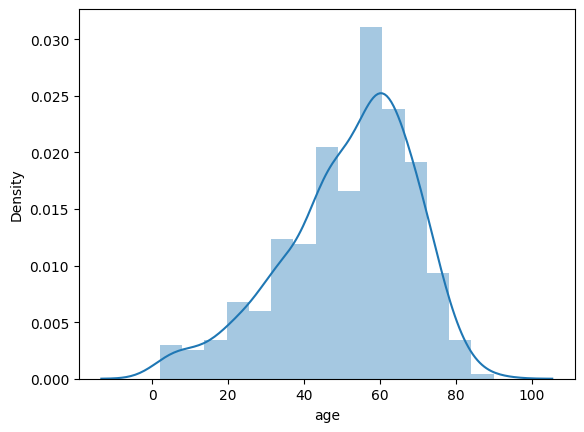

In [86]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age vs blood scatter Plot')

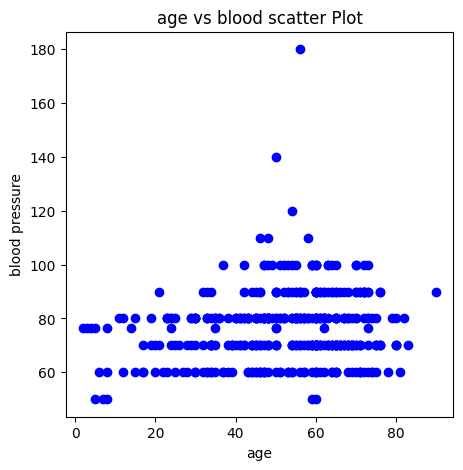

In [87]:
import matplotlib.pyplot as plt #import the matplotlib liharay
fig=plt.figure(figsize=(5,5)) #plot size
plt.scatter(data['age'],data['blood pressure'],color='blue')
plt.xlabel('age') #set the label for x-axis
plt.ylabel('blood pressure') #set the label for y axis
plt.title("age vs blood scatter Plot") #set a title for the axes

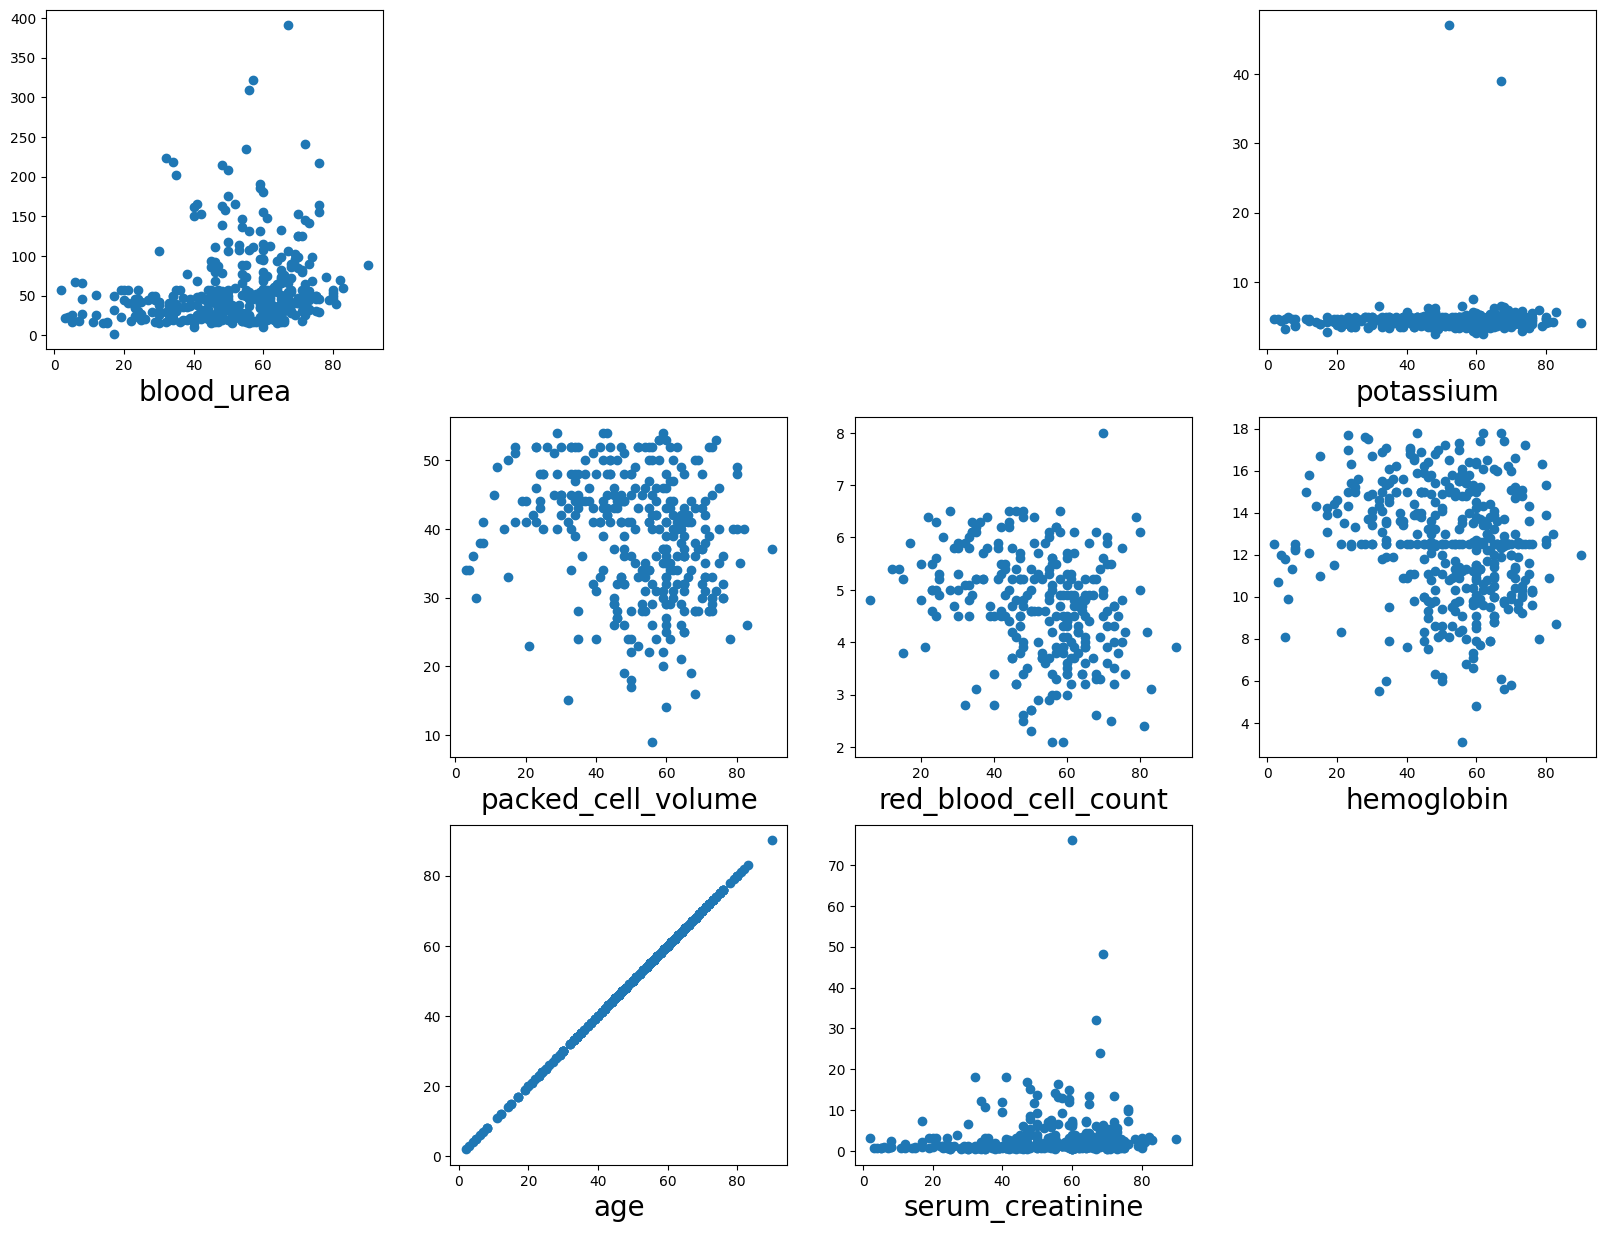

In [88]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber<=11:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            ax = plt.subplot(3,4,plotnumber) 
            plt.scatter(data['age'], data[column])
            plt.xlabel(column,fontsize=20)
        plotnumber+=1 
plt.show()



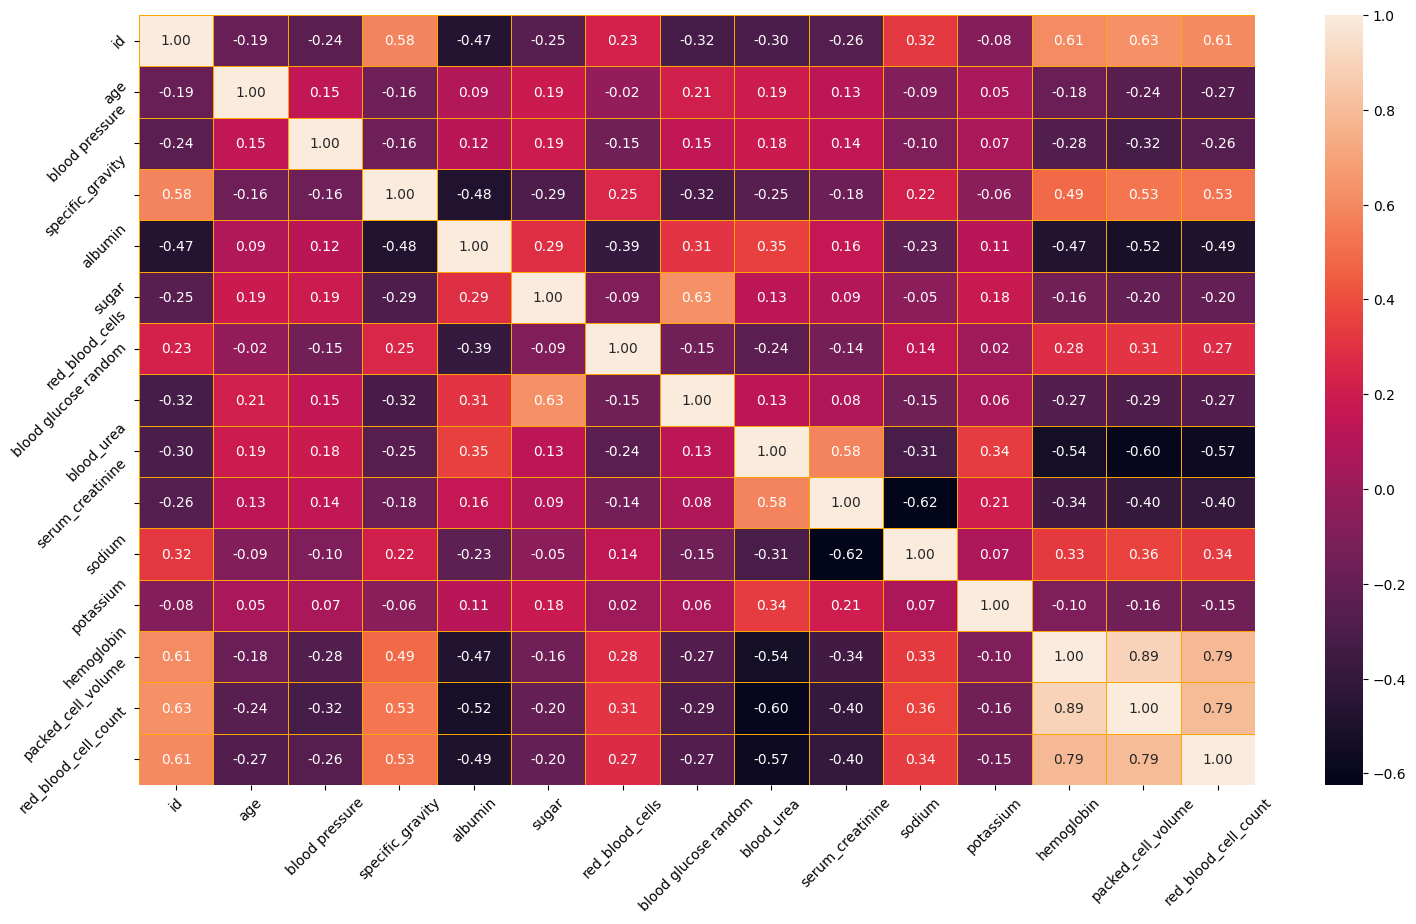

In [89]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

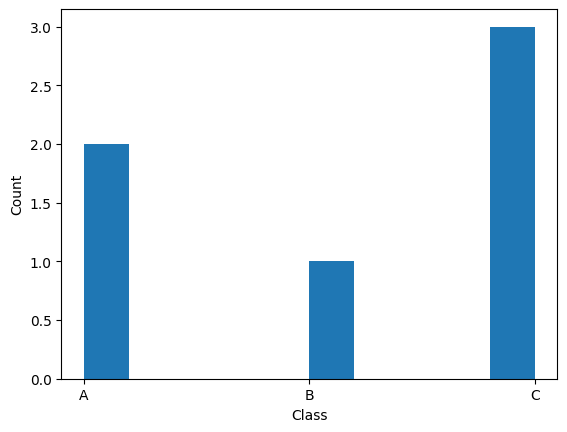

In [90]:
import matplotlib.pyplot as plt

# Create a sample DataFrame with a 'class' column
data = pd.DataFrame({'class': ['A', 'A', 'B', 'C', 'C', 'C']})

# Use Matplotlib to create a countplot
fig, ax = plt.subplots()
ax.hist(data['class'])
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.show()


In [91]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a sample 2D array of input data
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Create a StandardScaler object and call its fit_transform() method
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Print the standardized input data
print(x_scaled)


[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [92]:
selcols=['red_blood_cells', 'pus_cell', 'blood glucose random', 'blood_urea',
        'pedal_edema', 'anemia','diabetes mellitus', 'coronary artery_disease'] 
x=pd.DataFrame(data, columns=selcols)
y=pd.DataFrame(data, columns=['class']) 
print(x.shape) 
print(y.shape)

(6, 8)
(6, 1)


In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [94]:
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [95]:
classification = Sequential()
classification.add(Dense (30, activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [96]:
classification.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [97]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Create a sample dataset
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])

# Create a simple Keras model
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(2,), activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for 100 epochs with batch size of 2 and 20% validation split
model.fit(x_train, y_train, batch_size=2, validation_split=0.2, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 186ms/step - loss: 1.0550 - accuracy: 0.3333 - val_loss: 0.2391 - val_accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 39ms/step - loss: 1.0527 - accuracy: 0.3333 - val_loss: 0.2404 - val_accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 53ms/step - loss: 1.0505 - accuracy: 0.3333 - val_loss: 0.2416 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 61ms/step - loss: 1.0484 - accuracy: 0.3333 - val_loss: 0.2429 - val_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 36ms/step - loss: 1.0462 - accuracy: 0.3333 - val_loss: 0.2442 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 38ms/step - loss: 1.0449 - accuracy: 0.3333 - val_loss: 0.2455 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 39ms/step - loss: 1.0420 - accuracy: 0.3333 - val_loss: 0.2466 - val_accuracy: 1.0000
Epoch 8/100
2/2 [==

In [98]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Create a sample dataset
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])
x_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_test = np.array([0, 1, 1, 0])

# Create a RandomForestClassifier object
rfc = RandomForestClassifier(n_estimators=100)

# Train the model using the training data
rfc.fit(x_train, y_train)

# Test the model using the testing data
y_pred = rfc.predict(x_test)

# Calculate the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [100]:
y_predict= rfc.predict(x_test)

In [101]:
y_predict_train = rfc.predict(x_train)

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [103]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [104]:
y_predict= dtc.predict(x_test) 
y_predict

array([0, 1, 1, 0])

In [106]:
from sklearn.linear_model import LogisticRegression 
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [107]:
from sklearn.metrics import accuracy_score, classification_report
y_predict = lgr.predict(x_test)

In [108]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a sample dataset
X = np.array([[0, 0, 121.000000, 36.0, 0, 0, 1, 0], [1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y = np.array([0, 1])

# Create a LogisticRegression object
lgr = LogisticRegression()

# Train the model using the dataset
lgr.fit(X, y)

# Predict the outcome for a new set of input features
X_new = np.array([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y_pred = lgr.predict(X_new)

print(y_pred)


[1]


In [109]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create a sample dataset
X = np.array([[0, 0, 121.000000, 36.0, 0, 0, 1, 0], [1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y = np.array([0, 1])

# Create a DecisionTreeClassifier object
dtc = DecisionTreeClassifier()

# Train the model using the dataset
dtc.fit(X, y)

# Predict the outcome for a new set of input features
X_new = np.array([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y_pred = dtc.predict(X_new)

print(y_pred)


[1]


In [110]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a sample dataset
X = np.array([[0, 0, 121.000000, 36.0, 0, 0, 1, 0], [1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y = np.array([0, 1])

# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

# Train the model using the dataset
rfc.fit(X, y)

# Predict the outcome for a new set of input features
X_new = np.array([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y_pred = rfc.predict(X_new)

print(y_pred)


[1]


In [111]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("ckd.h5")

# Call predict on the model to create the weights
_ = model.predict(x_test)

# Save the model
model.save("ckd.h5")


1/1 [==============================] - 0s 103ms/step


In [112]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a sample dataset
X_train = np.array([[0, 0, 121.000000, 36.0, 0, 0, 1, 0], [1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y_train = np.array([0, 1])
X_test = np.array([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])

# Create a machine learning classifier object
# Example 1: Logistic Regression
classification = LogisticRegression()

# Example 2: Decision Tree
# classification = DecisionTreeClassifier()

# Example 3: Random Forest
# classification = RandomForestClassifier()

# Train the model using the training dataset
classification.fit(X_train, y_train)

# Predict the outcome for the test dataset
y_pred = classification.predict(X_test)

print(y_pred)


[1]


In [113]:
y_pred

array([1])

In [114]:
y_pred = (y_pred > 0.5)
y_pred

array([ True])

In [115]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1, -1)
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_value)

In [116]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: Low chance of CKD!')

Prediction: High chance of CKD!


In [117]:
from sklearn import model_selection


In [118]:
df = []
models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()), 
          ('DecisionTree', DecisionTreeClassifier()),


          ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['NO CKD', 'CKD']
for name, model in models:
  kfold = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 90210)
  cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
  clf = model.fit(x_train, y_train) 
  y_pred = clf.predict(x_test)
  print(name)
  print(classification_report(y_test, y_pred, target_names=target_names))
  results.append(cv_results)
  names.append(name)
  this_df = pd.DataFrame(cv_results)
  this_df['model'] = name
  dfs.append(this_df)
final=pd.concat(dfs, ignore_index=True)
return final

ValueError: ignored

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[2, 0],
       [2, 0]])

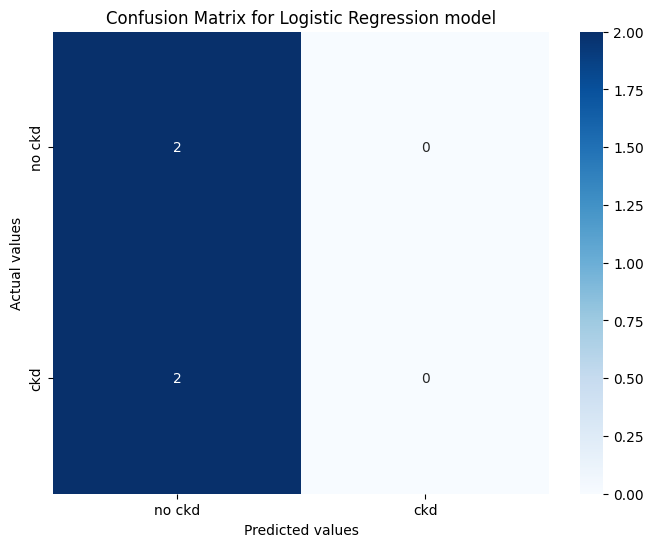

In [120]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [ ]:
print(classification_report(y_test), y_pred)